In [2]:
from pathlib import Path

import pandas as pd
import polaris as po

from matplotlib import pyplot as plt
from polaris.utils.types import TargetType

# Reset matplotlib to default settings to avoid custom matplotlibrc issues
plt.rcdefaults()

In [3]:
# Configuration: Set which k values to plot
# Options: 'all', 'even', 'odd'
K_FILTER = 'all'  # Change this to 'even' or 'odd' to filter k values

# Set to True to normalize all y-axes to 0-1 range, False for data-driven ranges
NORMALIZE_Y_AXIS = True

output_dir = Path("data") / "final_data" / "knn_probing_plots"
output_dir.mkdir(exist_ok=True)

In [4]:
# Load the data
df = pd.read_csv(Path("data") / "intermediate_data" / "knn_probing_metrics.tsv", sep="\t")
df

,Unnamed: 0,k,sensitivity,specificity,roc_auc,pr_auc,balanced_accuracy,precision,f1,endpoint,split_strategy,representation_type,fold,num_ties
0,0,1.0,0.470588,0.771930,0.621259,0.511336,0.621259,0.606061,0.529801,APR_HepG2_CellLoss_72h_dn,Random,morgan_count,0,0
1,1,2.0,0.470588,0.771930,0.677761,0.608750,0.621259,0.606061,0.529801,APR_HepG2_CellLoss_72h_dn,Random,morgan_count,0,2
2,2,3.0,0.470588,0.842105,0.693550,0.664066,0.656347,0.689655,0.559441,APR_HepG2_CellLoss_72h_dn,Random,morgan_count,0,0
3,3,4.0,0.458824,0.842105,0.685088,0.655492,0.650464,0.684211,0.549296,APR_HepG2_CellLoss_72h_dn,Random,morgan_count,0,0
4,4,5.0,0.400000,0.824561,0.674665,0.633482,0.612281,0.629630,0.489209,APR_HepG2_CellLoss_72h_dn,Random,morgan_count,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,195,196.0,0.507937,0.918245,0.796895,0.483359,0.713091,0.438356,0.470588,nr_er,Agglomerative clustering,chemeleon,4,0
279996,196,197.0,0.507937,0.919242,0.797896,0.483378,0.713589,0.441379,0.472325,nr_er,Agglomerative clustering,chemeleon,4,0
279997,197,198.0,0.507937,0.920239,0.798042,0.486294,0.714088,0.444444,0.474074,nr_er,Agglomerative clustering,chemeleon,4,0
279998,198,199.0,0.507937,0.921236,0.798256,0.486912,0.714586,0.447552,0.475836,nr_er,Agglomerative clustering,chemeleon,4,0


In [12]:
# Explore the data
print(f"Unique endpoints: {df['endpoint'].nunique()}")
print(f"Endpoints: {df['endpoint'].unique()}")
print(f"\nUnique split strategies: {df['split_strategy'].unique()}")
print(f"Unique representation types: {df['representation_type'].unique()}")
print(f"Unique k values: {sorted(df['k'].unique())}")
print(f"Unique folds: {sorted(df['fold'].unique())}")

Unique endpoints: 20
Endpoints: ['APR_HepG2_CellLoss_72h_dn' 'ATG_NRF2_ARE_CIS_up' 'ATG_PXRE_CIS_up'
 'BSK_3C_HLADR_down' 'BSK_3C_Proliferation_down' 'BSK_3C_SRB_down'
 'BSK_3C_Vis_down' 'BSK_4H_Eotaxin3_down' 'BSK_CASM3C_Proliferation_down'
 'BSK_LPS_VCAM1_down' 'BSK_SAg_CD38_down' 'BSK_SAg_CD40_down'
 'BSK_SAg_Proliferation_down' 'BSK_hDFCGF_CollagenIII_down'
 'BSK_hDFCGF_Proliferation_down' 'CEETOX_H295R_11DCORT_dn'
 'CEETOX_H295R_ANDR_dn' 'TOX21_ARE_BLA_agonist_ratio'
 'TOX21_TR_LUC_GH3_Antagonist' 'nr_er']

Unique split strategies: ['Random' 'Agglomerative clustering']
Unique representation types: ['morgan_count' 'morgan' 'rdkit_physchem' 'mordred' 'chemprop'
 'chemeleon_no_pretraining' 'chemeleon']
Unique k values: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.floa

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: data/final_data/knn_probing_plots/publication_figure_random_split_horizontal_titles.png
Saved: data/final_data/knn_probing_plots/publication_figure_random_split_horizontal_titles.eps


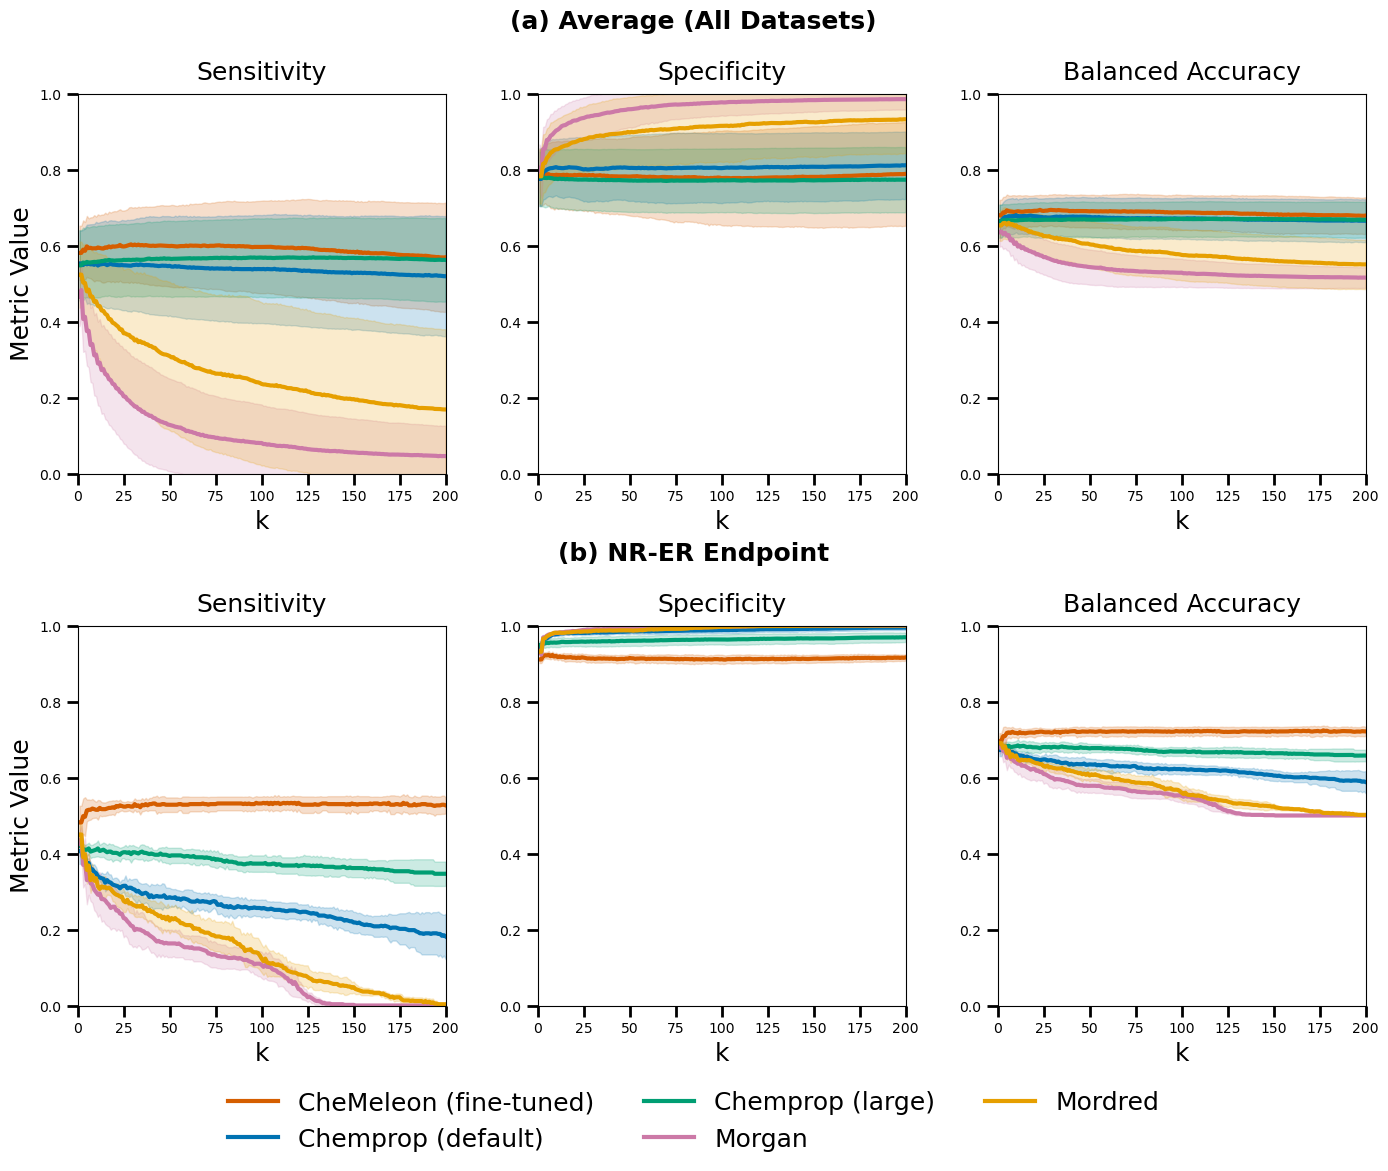

In [19]:
# Alternative: Horizontal row titles above each row using fig.text()

import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

random_split = 'Random'
plot_metrics = ['sensitivity', 'specificity', 'balanced_accuracy']
metric_labels = ['Sensitivity', 'Specificity', 'Balanced Accuracy']

# --- DISPLAY CONFIGURATION ---
display_names = {
    'chemeleon': 'CheMeleon (fine-tuned)',
    'chemprop': 'Chemprop (default)',
    'chemeleon_no_pretraining': 'Chemprop (large)',
    'morgan_count': 'Morgan',
    'mordred': 'Mordred'
}

legend_order = [
    'CheMeleon (fine-tuned)',
    'Chemprop (default)',
    'Chemprop (large)',
    'Morgan',
    'Mordred'
]

# --- Custom Color Palette (CVD-Friendly) ---
custom_colors = ["#D55E00", "#0072B2", "#009E73", "#CC79A7", "#E69F00"]
color_map = dict(zip(legend_order, custom_colors))

# --- Prepare Data ---
df_plot = df.copy()
df_plot = df_plot[df_plot['representation_type'].isin(display_names.keys())]
df_plot['representation_type'] = df_plot['representation_type'].map(display_names)

# --- FIGURE SETUP with GridSpec ---
fig = plt.figure(figsize=(14, 12))

# GridSpec: 2 rows x 3 cols
gs = gridspec.GridSpec(
    2, 3, 
    figure=fig,
    height_ratios=[1, 1],
    hspace=0.40,           # Space between rows
    wspace=0.25,
    top=0.88,              # Lower top to make room for (a) title
    bottom=0.12,           # More space for 2-row legend at bottom
    left=0.06,
    right=0.98
)

# --- Define row contexts ---
contexts = ["average", "nr_er"]
row_titles = ["(a) Average (All Datasets)", "(b) NR-ER Endpoint"]

# --- Plot each row and store axes for positioning titles ---
all_axes = []
for row_idx, context in enumerate(contexts):
    row_axes = []
    # Filter data for this context
    subset = df_plot[df_plot['split_strategy'] == random_split]
    if context == "nr_er":
        subset = subset[subset['endpoint'] == 'nr_er']
    
    grouped_main = subset.groupby(['k', 'representation_type'], as_index=False)
    
    for col_idx, (metric, metric_label) in enumerate(zip(plot_metrics, metric_labels)):
        ax = fig.add_subplot(gs[row_idx, col_idx])
        row_axes.append(ax)
        
        if subset.empty:
            ax.axis('off')
            continue

        grouped = grouped_main[metric].agg(['mean', 'std']).reset_index()

        for rep_type in legend_order:
            rep_data = grouped[grouped['representation_type'] == rep_type]
            
            if K_FILTER == 'even':
                rep_data = rep_data[rep_data['k'] % 2 == 0]
            elif K_FILTER == 'odd':
                rep_data = rep_data[rep_data['k'] % 2 == 1]

            if rep_data.empty:
                continue
            
            c = color_map[rep_type]
            
            ax.plot(
                rep_data['k'],
                rep_data['mean'],
                color=c,
                linestyle="-",
                linewidth=3.0,
                label=rep_type
            )
            ax.fill_between(
                rep_data['k'],
                rep_data['mean'] - rep_data['std'],
                rep_data['mean'] + rep_data['std'],
                color=c,
                alpha=0.2
            )
        
        # --- Styling ---
        ax.set_title(metric_label, fontsize=18, pad=10)
        
        if col_idx == 0:
            ax.set_ylabel("Metric Value", fontsize=18)
        ax.set_xlabel("k", fontsize=18)
        
        if NORMALIZE_Y_AXIS:
            ax.set_ylim(0, 1)
        ax.set_xlim(0, 200)
        
        ax.tick_params(axis="both", which="major", width=2.0, length=8)
        ax.tick_params(axis="both", which="minor", width=1.5, length=4)
    
    all_axes.append(row_axes)

# --- Add horizontal row titles with CONSISTENT gap above each row ---
ROW_TITLE_GAP = 0.05  # Consistent gap above subplot top

for row_idx, (row_title, row_axes) in enumerate(zip(row_titles, all_axes)):
    # Get the top of this row's subplots
    ax_top = row_axes[0].get_position().y1
    # Place title at consistent gap above
    title_y = ax_top + ROW_TITLE_GAP
    
    fig.text(
        0.5, title_y, 
        row_title, 
        ha='center', 
        va='bottom',
        fontsize=18, 
        weight='bold'
    )

# --- Global Legend (2 rows: 3 on top, 2 on bottom centered) ---
custom_lines = [Line2D([0], [0], color=color_map[name], lw=3) for name in legend_order]

fig.legend(
    custom_lines,
    legend_order,
    ncol=3,  # 3 columns = first row has 3, second row has 2
    frameon=False,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.02),
    fontsize=18,
    columnspacing=2.0,  # Space between columns
)

# --- Save ---
outfile_png = output_dir / "publication_figure_random_split_horizontal_titles.png"
outfile_eps = output_dir / "publication_figure_random_split_horizontal_titles.eps"
fig.savefig(outfile_png, dpi=600, bbox_inches="tight")
fig.savefig(outfile_eps, format='eps', bbox_inches="tight")
print(f"Saved: {outfile_png}")
print(f"Saved: {outfile_eps}")

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: data/final_data/knn_probing_plots/publication_figure_agglomerative_split_horizontal_titles.png
Saved: data/final_data/knn_probing_plots/publication_figure_agglomerative_split_horizontal_titles.eps


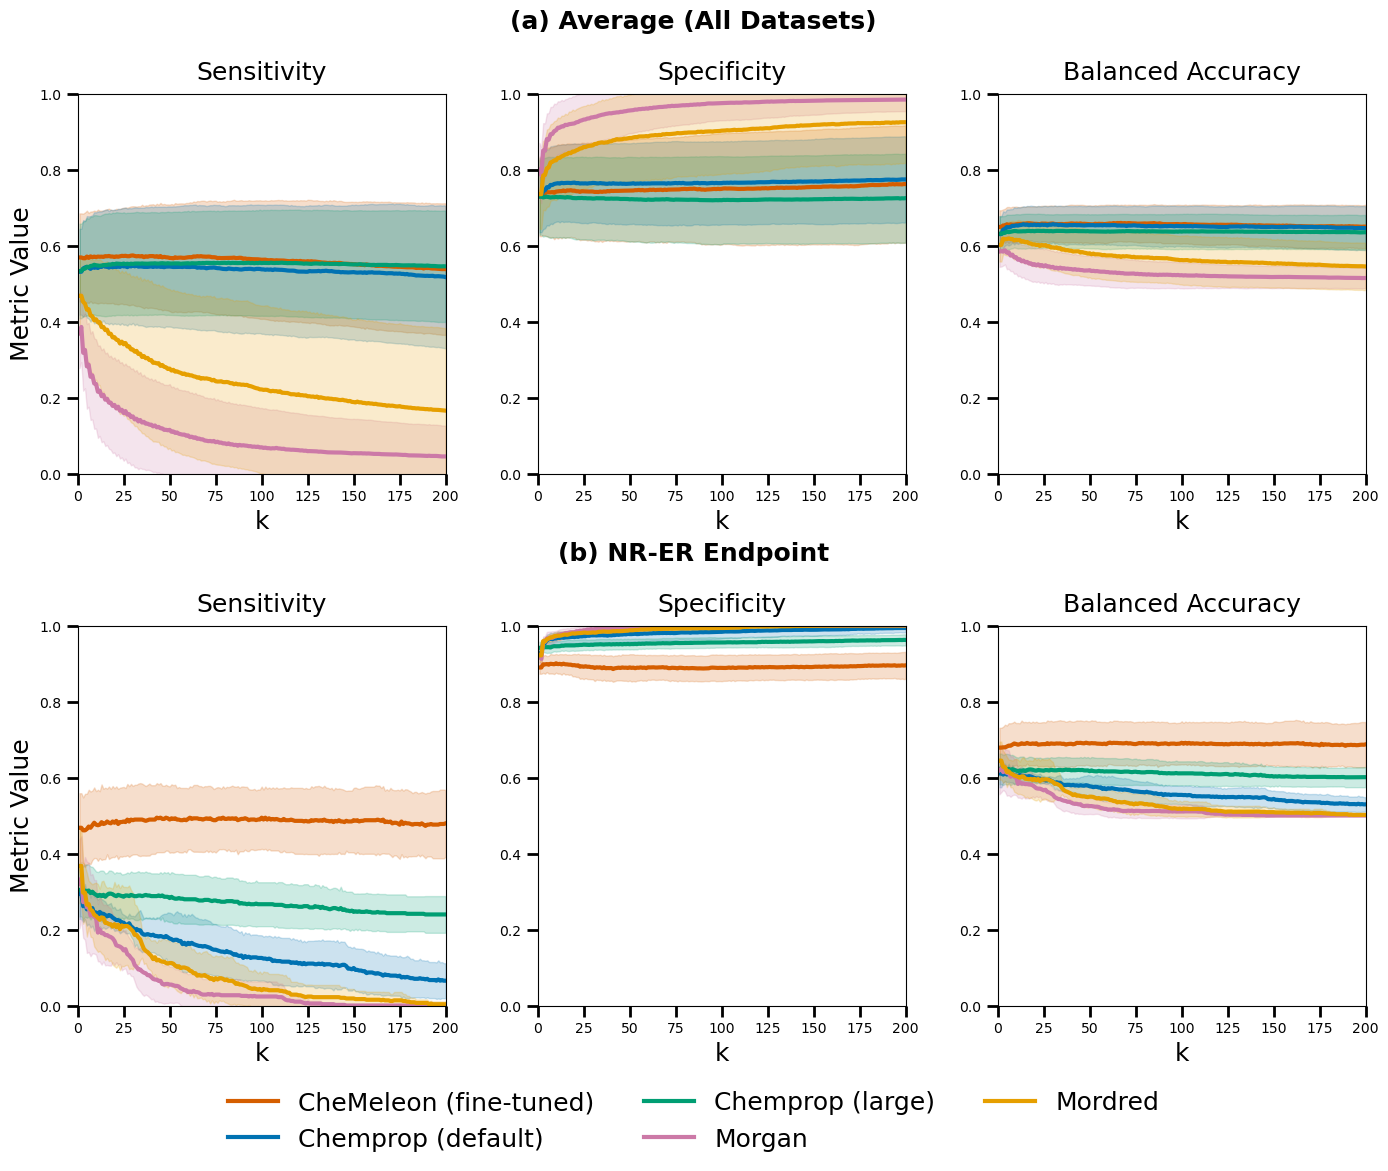

In [20]:
# Alternative: Horizontal row titles above each row using fig.text()

import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

agglomerative_split = 'Agglomerative clustering'
plot_metrics = ['sensitivity', 'specificity', 'balanced_accuracy']
metric_labels = ['Sensitivity', 'Specificity', 'Balanced Accuracy']

# --- DISPLAY CONFIGURATION ---
display_names = {
    'chemeleon': 'CheMeleon (fine-tuned)',
    'chemprop': 'Chemprop (default)',
    'chemeleon_no_pretraining': 'Chemprop (large)',
    'morgan_count': 'Morgan',
    'mordred': 'Mordred'
}

legend_order = [
    'CheMeleon (fine-tuned)',
    'Chemprop (default)',
    'Chemprop (large)',
    'Morgan',
    'Mordred'
]

# --- Custom Color Palette (CVD-Friendly) ---
custom_colors = ["#D55E00", "#0072B2", "#009E73", "#CC79A7", "#E69F00"]
color_map = dict(zip(legend_order, custom_colors))

# --- Prepare Data ---
df_plot = df.copy()
df_plot = df_plot[df_plot['representation_type'].isin(display_names.keys())]
df_plot['representation_type'] = df_plot['representation_type'].map(display_names)

# --- FIGURE SETUP with GridSpec ---
fig = plt.figure(figsize=(14, 12))

# GridSpec: 2 rows x 3 cols
gs = gridspec.GridSpec(
    2, 3, 
    figure=fig,
    height_ratios=[1, 1],
    hspace=0.40,           # Space between rows
    wspace=0.25,
    top=0.88,              # Lower top to make room for (a) title
    bottom=0.12,           # More space for 2-row legend at bottom
    left=0.06,
    right=0.98
)

# --- Define row contexts ---
contexts = ["average", "nr_er"]
row_titles = ["(a) Average (All Datasets)", "(b) NR-ER Endpoint"]

# --- Plot each row and store axes for positioning titles ---
all_axes = []
for row_idx, context in enumerate(contexts):
    row_axes = []
    # Filter data for this context
    subset = df_plot[df_plot['split_strategy'] == agglomerative_split]
    if context == "nr_er":
        subset = subset[subset['endpoint'] == 'nr_er']
    
    grouped_main = subset.groupby(['k', 'representation_type'], as_index=False)
    
    for col_idx, (metric, metric_label) in enumerate(zip(plot_metrics, metric_labels)):
        ax = fig.add_subplot(gs[row_idx, col_idx])
        row_axes.append(ax)
        
        if subset.empty:
            ax.axis('off')
            continue

        grouped = grouped_main[metric].agg(['mean', 'std']).reset_index()

        for rep_type in legend_order:
            rep_data = grouped[grouped['representation_type'] == rep_type]
            
            if K_FILTER == 'even':
                rep_data = rep_data[rep_data['k'] % 2 == 0]
            elif K_FILTER == 'odd':
                rep_data = rep_data[rep_data['k'] % 2 == 1]

            if rep_data.empty:
                continue
            
            c = color_map[rep_type]
            
            ax.plot(
                rep_data['k'],
                rep_data['mean'],
                color=c,
                linestyle="-",
                linewidth=3.0,
                label=rep_type
            )
            ax.fill_between(
                rep_data['k'],
                rep_data['mean'] - rep_data['std'],
                rep_data['mean'] + rep_data['std'],
                color=c,
                alpha=0.2
            )
        
        # --- Styling ---
        ax.set_title(metric_label, fontsize=18, pad=10)
        
        if col_idx == 0:
            ax.set_ylabel("Metric Value", fontsize=18)
        ax.set_xlabel("k", fontsize=18)
        
        if NORMALIZE_Y_AXIS:
            ax.set_ylim(0, 1)
        ax.set_xlim(0, 200)
        
        ax.tick_params(axis="both", which="major", width=2.0, length=8)
        ax.tick_params(axis="both", which="minor", width=1.5, length=4)
    
    all_axes.append(row_axes)

# --- Add horizontal row titles with CONSISTENT gap above each row ---
ROW_TITLE_GAP = 0.05  # Consistent gap above subplot top

for row_idx, (row_title, row_axes) in enumerate(zip(row_titles, all_axes)):
    # Get the top of this row's subplots
    ax_top = row_axes[0].get_position().y1
    # Place title at consistent gap above
    title_y = ax_top + ROW_TITLE_GAP
    
    fig.text(
        0.5, title_y, 
        row_title, 
        ha='center', 
        va='bottom',
        fontsize=18, 
        weight='bold'
    )

# --- Global Legend (2 rows: 3 on top, 2 on bottom centered) ---
custom_lines = [Line2D([0], [0], color=color_map[name], lw=3) for name in legend_order]

fig.legend(
    custom_lines,
    legend_order,
    ncol=3,  # 3 columns = first row has 3, second row has 2
    frameon=False,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.02),
    fontsize=18,
    columnspacing=2.0,  # Space between columns
)

# --- Save ---
outfile_png = output_dir / "publication_figure_agglomerative_split_horizontal_titles.png"
outfile_eps = output_dir / "publication_figure_agglomerative_split_horizontal_titles.eps"
fig.savefig(outfile_png, dpi=600, bbox_inches="tight")
fig.savefig(outfile_eps, format='eps', bbox_inches="tight")
print(f"Saved: {outfile_png}")
print(f"Saved: {outfile_eps}")

plt.show()